In [14]:
import numpy as np
import pandas as pd
import pyecharts as pe
import matplotlib.pyplot as plt

In [22]:
data5 = pd.read_csv('/Users/valarian/Downloads/单车数据/曲阜数据/5-26 to 6-13/qufu_526_613_utc.csv', names=list(range(7)))
data5.head()

,0,1,2,3,4,5,6
0,100076952,0100076952_3555495_11701820,35.554955,117.018204,2017-6-7 04:32:02,2017-6-7 08:30:34,1
1,5316539468,5316539468_3560724_11703593,35.607245,117.035931,2017-6-8 08:42:43,2017-6-8 12:41:34,1
2,100236684,0100236684_3557194_11697951,35.571947,116.979518,2017-6-8 08:51:58,2017-6-8 10:58:18,1
3,100226493,0100226493_3557195_11697950,35.571953,116.979509,2017-6-8 08:58:06,2017-6-8 09:54:41,1
4,100240777,0100240777_3558884_11694715,35.588850,116.947152,2017-6-8 08:48:16,2017-6-8 20:46:19,1


In [18]:
data = pd.read_csv('/Users/valarian/Downloads/单车数据/曲阜数据/5-26 to 6-13/qufu_526_613_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
data3 = pd.read_csv('/Users/valarian/Downloads/单车数据/曲阜数据/6-13/qufu_613_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
data4 = pd.read_csv('/Users/valarian/Downloads/单车数据/曲阜数据/6-13 ~ 7-3/qufu_613_703_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
data2 = pd.concat([data, data3, data4], axis = 0, ignore_index=True)
data2.head()
day = pd.Series([int(d.split('-')[-1].split(' ')[0]) for d in data2.time])
data2['day'] = day
hour = pd.Series([int(h[-8:-6]) for h in data2.time])
data2['hour'] = hour
data2.head()

,bid,lat,lng,time,day,hour
0,100076952,35.554955,117.018204,2017-6-7 04:32:02,7,4
1,5316539468,35.607245,117.035931,2017-6-8 08:42:43,8,8
2,100236684,35.571947,116.979518,2017-6-8 08:51:58,8,8
3,100226493,35.571953,116.979509,2017-6-8 08:58:06,8,8
4,100240777,35.588850,116.947152,2017-6-8 08:48:16,8,8


In [27]:
class a:
    self.temp = 0
    def b(self, c: int) -> int:
        if c == 0:
            return c
        else: 
            self.temp = self.temp + c
            b(c-1)
            
if __name__ == '__init__':
    a()

bid     1632478
lat     1632478
lng     1632478
time    1632478
day     1632478
hour    1632478
dtype: int64

In [6]:
set([1,2]) - set([1])

{2}

In [28]:
len(set(data2.bid))

5208

In [29]:
data2.isnull().sum()

bid     0
lat     0
lng     0
time    0
day     0
hour    0
dtype: int64

In [30]:
data.duplicated().sum()
#data.drop_duplicates()

0

In [31]:
print(min(data2.time), max(data2.time))

2017-5-26 07:09:15 2017-7-2 15:59:56


In [9]:
data2.bid.count()

7988862

In [32]:
data2.describe()

,bid,lat,lng,day,hour
count,1.632478e+06,1.632478e+06,1.632478e+06,1.632478e+06,1.632478e+06
mean,1.863922e+09,3.558554e+01,1.169868e+02,1.745037e+01,1.088046e+01
std,2.467961e+09,1.332446e-02,2.329074e-02,8.779412e+00,6.667955e+00
min,1.000722e+08,3.554997e+01,1.169402e+02,1.000000e+00,0.000000e+00
25%,1.002281e+08,3.557994e+01,1.169707e+02,1.200000e+01,5.000000e+00
50%,1.002397e+08,3.558719e+01,1.169879e+02,1.800000e+01,1.100000e+01
75%,5.316521e+09,3.559427e+01,1.169989e+02,2.500000e+01,1.600000e+01
max,1.000000e+10,3.562437e+01,1.170725e+02,3.100000e+01,2.300000e+01


In [33]:
print(max(data2.lng), min(data2.lng), max(data2.lat), min(data2.lat))

117.072540433963 116.940193363205 35.6243726119818 35.549965720608895


In [7]:
day = pd.Series([int(d.split('-')[-1].split(' ')[0]) for d in data.5])
data['day'] = day
hour = pd.Series([int(h[-8:-6]) for h in data.time])
data['hour'] = hour

SyntaxError: invalid syntax (<ipython-input-7-df3d00ee0707>, line 1)

In [34]:
line = (
    pe.charts.Line()
    .add_xaxis(list(range(24)))
    .add_yaxis('记录数', [data2[data2.hour == x].count()[0]/14 for x in range(24)], is_symbol_show = False)
    .set_global_opts(
        title_opts=pe.options.TitleOpts(title="平均每日每个小时间隔数据量统计"),
    )
)
line.render_notebook()

In [36]:
gp = data2.groupby('bid')
gp

In [5]:
gp.count().lat.head()

bid
0013N    25
0018B    28
001Qn    12
001xe     2
005lb     9
Name: lat, dtype: int64

In [8]:
max(gp.count().lat)

1064

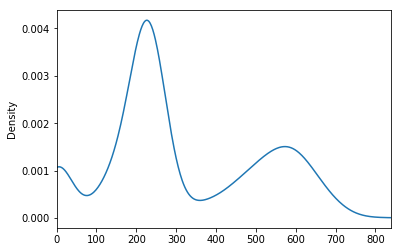

In [37]:
df = pd.DataFrame(gp.count().lat)
df.plot(kind = 'kde', xlim = (0,max(gp.count().lat)+1), legend = False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
city_map = gpd.read_file('/Users/valarian/SJTU/SJTU/Data/shanghaitown/shanghaitown.shp')
geometry = [Point(xy) for xy in zip(data2.lng, data2.lat)]
geo_df = gpd.GeoDataFrame(data2, geometry = geometry)
#fig, ax = plt.subplots(10,3,figsize = (15,60))
days = set(geo_df['day'])
for i in days:
    fig, ax = plt.subplots(1,1,figsize = (4,4))
    city_map.plot(ax = ax, alpha = 0.4)#, alpha = 0.4, color = 'grey')
    geo_df[geo_df['day'] == i].plot(ax =ax, markersize = 0.2)
    ax.set_title('day of month '+str(i))
    plt.savefig('./qufu/eachday' + str(i) +'.png')

# city_map.plot(ax = ax[i], alpha = 0.4)#, alpha = 0.4, color = 'grey')
# geo_df[geo_df['hour'] == i].plot(ax =ax[i], markersize = 0.2)
# ax[i].set_title(i+1)

